In [1]:
!pip install word2number

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5680 sha256=eaa7ff2dab167016991ba89d00142f7c6fbd31a291be95c89586219725dfe855
  Stored in directory: c:\users\youexcel\appdata\local\pip\cache\wheels\aa\2b\71\ede4a3c3520a8374778c16c345e0e78e25d1ffe38f4c5c1e8a
Successfully built word2number


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('hiring.csv')

In [4]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [6]:
from word2number import w2n


In [10]:
df.info



<bound method DataFrame.info of   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000>

In [12]:
df.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [15]:
df['experience']= df['experience'].apply(lambda x: w2n.word_to_num(str(x)) if pd.notnull(x) else None)


In [16]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [17]:
df['experience'] = df['experience'].fillna(0)

In [18]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [28]:
df = df.rename(columns={'test_score(out of 10)': 'TestScore', 'interview_score(out of 10)': 'InterviewScore','salary($)':'Salary'})


In [29]:
df

,experience,TestScore,InterviewScore,Salary
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [32]:
df['TestScore'] = df['TestScore'].fillna(df['TestScore'].mean())

In [33]:
df

,experience,TestScore,InterviewScore,Salary
0,0.0,8.000000,9,50000
1,0.0,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


In [37]:
new_df = df.drop ('Salary', axis='columns')
Salary = df.Salary
Salary

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: Salary, dtype: int64

In [43]:
!pip install scikit-learn
from sklearn import linear_model


In [44]:
reg = linear_model.LinearRegression()
reg.fit(new_df,Salary)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
reg.predict([[2,9,6]])

C:\Users\YOUEXCEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53290.89255945])

In [46]:
reg.predict([[12,10,10]])

C:\Users\YOUEXCEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])

In [55]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

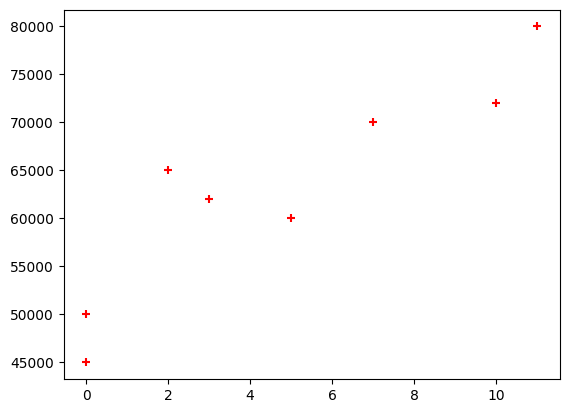

In [56]:
plt.scatter(df.experience,df.Salary,color='red',marker='+')


NameError: name 'sns' is not defined

<Axes: xlabel='experience', ylabel='Salary'>

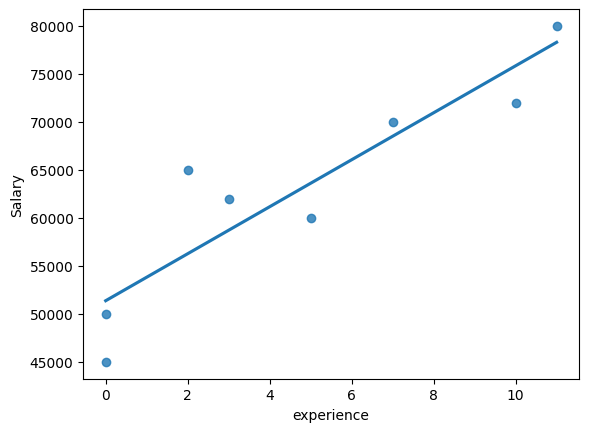

In [59]:
sns.regplot(x=df.experience,y=df.Salary,data=df,ci=None)